<a href="https://colab.research.google.com/github/moonstar0301/Corn_Future_Prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 데이터 불러오기
df = pd.read_excel('/content/drive/MyDrive/Fixed_Corn_Data.xlsx', index_col=0)

# 훈련 데이터와 테스트 데이터로 분리
train_start, train_end = '2002-01', '2017-12'
test_start, test_end = '2018-01', '2021-12'
train = df.loc[train_start:train_end, :]
test = df.loc[test_start:test_end, :]

# 종속변수와 독립변수 나누기
X_train = train[['옥수수선물_M1M', 'WTI종가','달러화가치','NonComm_Positions_Long_All']]
y_train = train[['옥수수선물']]
X_test = test[['옥수수선물_M1M', 'WTI종가','달러화가치','NonComm_Positions_Long_All']]
y_test = test[['옥수수선물']]

# 스케일링
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# 데이터 전처리
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps, :])
        ys.append(y[i+time_steps, 0])
    return np.array(Xs), np.array(ys)

time_steps = 1

X_train_processed, y_train_processed = create_dataset(X_train_scaled, y_train_scaled, time_steps)
X_test_processed, y_test_processed = create_dataset(X_test_scaled, y_test_scaled, time_steps)

# 모델 학습
model = Sequential()
model.add(LSTM(units=10, input_shape=(time_steps, X_train_processed.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_processed, y_train_processed, epochs=500, batch_size=20, verbose=1)

Epoch 1/500
10/10 [==============================] - 2s 4ms/step - loss: 0.1341
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1076
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0669
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0424
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0355
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0306
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0273
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0253
Epoch 11/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0240
Epoch 12/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 13/500
10/10 [=================

In [23]:
# 예측
y_train_predicted = model.predict(X_train_processed)
y_test_predicted = model.predict(X_test_processed)

# 스케일링 복원
y_train_predicted = scaler_y.inverse_transform(y_train_predicted)
y_test_predicted = scaler_y.inverse_transform(y_test_predicted)
y_train_actual = scaler_y.inverse_transform(y_train_processed.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test_processed.reshape(-1, 1))

# MAPE 계산
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mape(y_train_actual, y_train_predicted)
test_mape = mape(y_test_actual, y_test_predicted)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

2/2 [==============================] - 0s 6ms/step
Train MAPE: 8.379603477153523
Test MAPE: 8.472713602207447


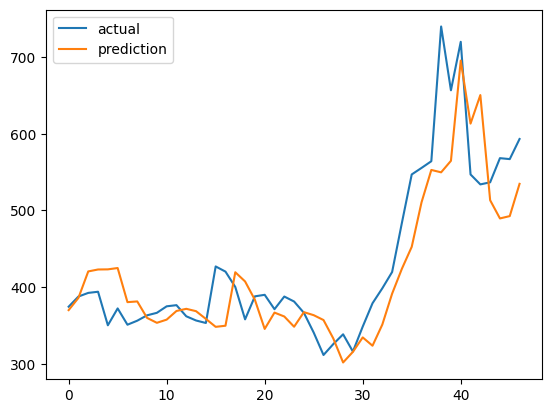

In [24]:
import matplotlib.pyplot as plt
#test_mape = mape(y_test_actual, y_test_predicted)
plt.plot(y_test_actual, label='actual')
plt.plot(y_test_predicted, label='prediction')
plt.legend()
plt.show()